In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

from torch.utils.data import TensorDataset, DataLoader, Dataset

import torch.nn.functional as F

import numpy as np


import matplotlib.pyplot as plt

from PIL import Image

import os
import glob


from MyDataLoader import ShuffleDataLoader
from FileReader import get_picture_tensors
from MyModels import SimpleCNN
from ModelEvaluation import eval_model


In [2]:
# data params
n_classes = 100
required_train_imgs = 10
required_test_imgs = 1

In [3]:
(train_images, val_images, test_images, 
 train_labels, val_labels, test_labels) = get_picture_tensors(n_classes=n_classes, 
                                                              required_train_imgs=required_train_imgs, 
                                                              required_test_imgs=required_test_imgs)

Chargement de dataset_chat/0001  ->  12/17 images
Chargement de dataset_chat/0002  ->  12/20 images
Chargement de dataset_chat/0003  ->  12/15 images
Chargement de dataset_chat/0004  ->  12/56 images
Chargement de dataset_chat/0005  ->  12/41 images
Chargement de dataset_chat/0006  ->  12/40 images
Chargement de dataset_chat/0007  ->  12/41 images
Chargement de dataset_chat/0008  ->  12/18 images
Chargement de dataset_chat/0009  ->  12/13 images
Chargement de dataset_chat/0010  ->  12/19 images
Chargement de dataset_chat/0011  ->  12/26 images
Chargement de dataset_chat/0012  ->  12/17 images
dataset_chat/0013 does not contain enough images, will not be used
Chargement de dataset_chat/0014  ->  12/16 images
Chargement de dataset_chat/0015  ->  12/53 images
Chargement de dataset_chat/0016  ->  12/32 images
Chargement de dataset_chat/0017  ->  12/62 images
Chargement de dataset_chat/0018  ->  12/54 images
Chargement de dataset_chat/0019  ->  12/46 images
Chargement de dataset_chat/0020  

In [4]:
# params du modèle, essayer avec gridsearch (idéalement Randomized pour ne pas prendre énormément de temps), avec une bonne machine durant la nuit ou qqch
# faudrait idéalement logger les performances selon chaque combination de params pour s'amuser
num_epochs = 4
batch_size = 8
learning_rate = 1e-3
momentum = 0.5
weight_decay = 1e-5 

model = SimpleCNN(n_classes)
model.train()
train_dataset = ShuffleDataLoader(train_images, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
val_dataset = ShuffleDataLoader(val_images, val_labels)


criterion = nn.CrossEntropyLoss()
params = filter(lambda x: x.requires_grad, model.parameters())
optimizer = optim.Adam(params, lr = learning_rate)

# Gossage sur les params potentiel
# criterion = nn.CrossEntropyLoss(reduction = 'sum')
# criterion = nn.CrossEntropyLoss(reduction = 'none')
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = optim.Adam(params, lr = learning_rate, weight_decay = weight_decay)
# optimizer = optim.SGD(params, lr = learning_rate, momentum = momentum)   

accuracy_at_each_epoch = []
for epoch in range(num_epochs):
    for images, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    accuracy_at_each_epoch.append(eval_model(model, val_dataset))
    
print('Training and evaluation finished.')

c:\Users\Antoine\miniconda3\envs\CatProject\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Antoine\miniconda3\envs\CatProject\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on validation dataset: 32.00%
Accuracy on validation dataset: 68.00%
Accuracy on validation dataset: 84.00%
Accuracy on validation dataset: 87.00%
Training and evaluation finished.


Text(0, 0.5, 'Accuracy (%)')

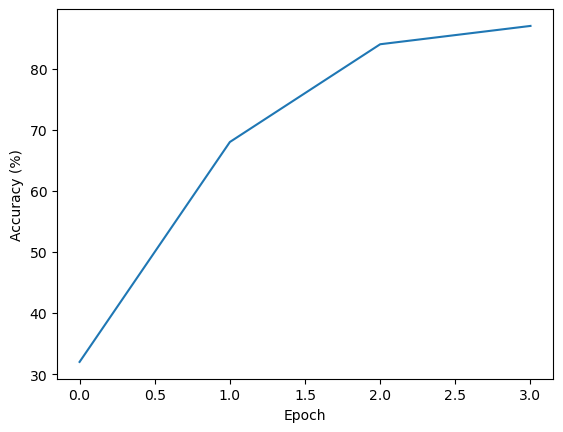

In [5]:
plt.plot(accuracy_at_each_epoch)
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

In [8]:
print(len(test_images))

test_dataset = ShuffleDataLoader(test_images, test_labels)
eval_model(model, test_dataset, type_of_dataset="test")

100
Accuracy on test dataset: 88.00%


88.0